# Импорты, ничего интересного

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

# Загрузка данных, тоже ничего интересного

In [25]:
activities = pd.read_csv('activities_clean.csv')
activities

,Unnamed: 0,molregno_F,assay_F,value_F,molregno_H,assay_H,value_H
0,1,65,33574,7.64,64.0,33574,9.16
1,2,67,33574,7.40,64.0,33574,9.16
2,3,123,50467,110.00,108.0,50467,500.00
3,4,128,50467,40.00,109.0,50467,500.00
4,5,214,206322,1.60,226.0,206322,1.00
...,...,...,...,...,...,...,...
63366,617758,2464403,1913964,24.00,2422855.0,1913964,50.00
63367,617759,2464403,1913964,24.00,2422855.0,1913964,50.00
63368,617762,2464403,1913964,24.00,2422855.0,1913964,50.00
63369,617763,2464403,1913964,24.00,2422855.0,1913964,50.00


# Графики!

Посмотрим на отношение активностей с фтором и без. Если оно в среднем более 1 - все ясно, предположение верно. Если нет - соответственно нет.

In [26]:
activities['FtoH'] = activities.value_F/activities.value_H
activities = activities.replace([np.inf, -np.inf], np.nan)
activities = activities.dropna()

<AxesSubplot:>

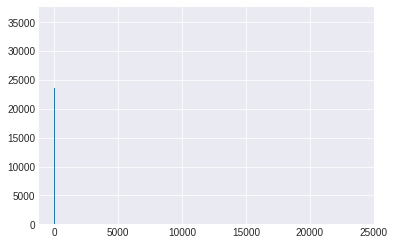

In [27]:
activities.FtoH.hist(bins=1000)

<AxesSubplot:>

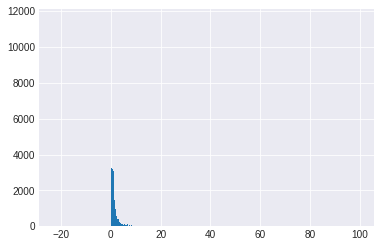

In [28]:
activities[(activities.FtoH<100) & (activities.FtoH>-100)].FtoH.hist(bins=1000)

<AxesSubplot:>

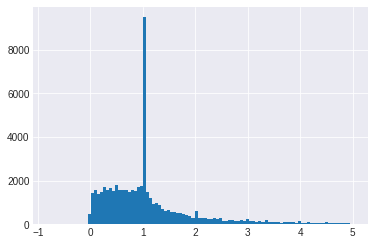

In [29]:
activities[(activities.FtoH<5) & (activities.FtoH>-1)].FtoH.hist(bins=100)

Как-то не вижу я чтобы оно нам что-то дало... Посмотрим на график act_F vs act_H(H - по иксу, синяя линия - y=x):

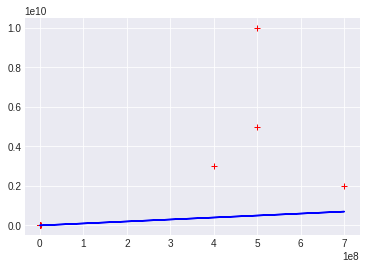

In [30]:
plt.plot(activities.value_H, activities.value_F, 'r+')
plt.plot(activities.value_H, activities.value_H, 'b-')

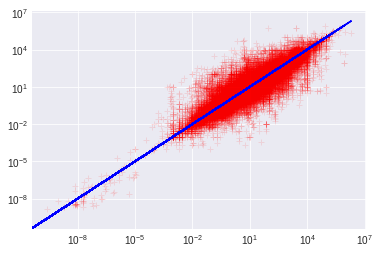

In [37]:
activities = activities[(activities.value_H<10e7) & (activities.value_F<10e7)]
plt.xscale('log')
plt.yscale('log')
plt.plot(activities.value_H, activities.value_F, 'r+', alpha=0.1)
plt.plot(activities.value_H, activities.value_H, 'b-')

Все еще неочеовидно. Попробуем срегрессировать точки и посмотреть на коэффициент...

[0.33666254] 0.24919134210883576 0.0


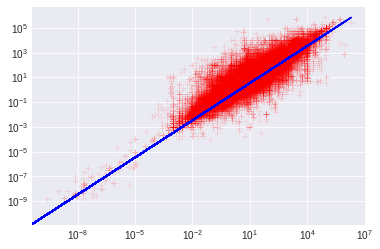

In [51]:
from sklearn.linear_model import LinearRegression
x = activities.value_H.to_numpy().reshape((-1, 1))
y = activities.value_F.to_numpy()
reg = LinearRegression(fit_intercept=0).fit(x, y)
print(reg.coef_, reg.score(x,y), reg.intercept_)

plt.xscale('log')
plt.yscale('log')
plt.plot(activities.value_H, activities.value_F, 'r+', alpha=0.1)
plt.plot(activities.value_H, activities.value_H*0.33666254, 'b-')

Как-то тоже не помогло... Посчитаем тупо число тех у кого стало больше/меньше

In [52]:
(activities.value_F> activities.value_H).describe()

count     60955
unique        2
top       False
freq      35364
dtype: object

получается что у 35к из 61к пар активность фторированного больше... Наверное что и требовалось доказать?